In [3]:
# Import Filter Warnings to prevent any warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import some important libraries in order to use them in analysis, visualization and Constructing the M.L Algorithm.
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

# Read the CSV file
df = pd.read_csv("bank-additional-full.csv")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Show the number of columns and rows of the dataset
df.shape

(41188, 21)

In [6]:
# Show some info about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Show some important info about only the numerical columns in the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# Show column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
# Change the name of some attributes.
list = []
for col in df.columns:
    col = col.replace('.', '_')
    list.append(col)
df.columns = list

In [10]:
# Check if there are null values or not?.
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [11]:
# Try to find columns have values equal to 'unknown'.
list = []
for col in df.columns:
    for value in df[col].unique():
        if value == 'unknown':
            list.append(col)            
print("Columns have unknown values: ")
c = 1
for i in list:
    print(f'{c}-', i)
    c += 1

Columns have unknown values: 
1- job
2- marital
3- education
4- default
5- housing
6- loan


Next, We use something called boolean masks or boolean varibles because we have a lot of rows contain un known values so we use boolean variable in order to get rows contain null value in each variable, combine these rows which at least contain only one unknown value and drop them all. 

In [12]:
# Creating a boolean mask(variable) for each attribute in order to get each row has at least one 'unknown' value
job_mask = df.job == "unknown"
marital_mask = df.marital == "unknown"
education_mask = df.education == "unknown"
default_mask = df.default == "unknown"
housing_mask = df.housing == "unknown"
loan_mask = df.loan == "unknown"
# Combining these masks and getting the indicies of rows contain at least one 'unknown' value
combined_masks = np.logical_or.reduce([job_mask, marital_mask, education_mask, default_mask, housing_mask, loan_mask])
com_masks_indicies = df[combined_masks].index
df.drop(com_masks_indicies, inplace=True)

In [13]:
# Check if the dataset has duplicates or not?.
df.duplicated().sum()

10

In [14]:
# Drop these duplicates
df.drop_duplicates(keep = 'first', inplace = True)

In [15]:
df.pdays.unique()   # 999 means that this client was not previously contacted 

array([999,   6,   4,   5,   1,   0,   3,  10,   7,   9,  11,   8,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27],
      dtype=int64)

In [16]:
# Calculating the mean of contacts performed during this marketing campaign for each person
print("The averge number of campaign contacts performed is", df.campaign.mean(), "contact")

The averge number of campaign contacts performed is 2.5217205853402453 contact


In [17]:
for col in df.columns[15:20 ,]:
    print(f'Unique values numbers of {col} >...> ', df[col].nunique() )

Unique values numbers of emp_var_rate >...>  10
Unique values numbers of cons_price_idx >...>  26
Unique values numbers of cons_conf_idx >...>  26
Unique values numbers of euribor3m >...>  314
Unique values numbers of nr_employed >...>  11


In [18]:
# Apply cross tabulation on age and job columns in order to get the mean of age for each job.
age_by_job = df.groupby('job')['age'].mean().reset_index()
age_by_job['age'] = round(age_by_job['age'])
age_by_job

,job,age
0,admin.,38.0
1,blue-collar,38.0
2,entrepreneur,41.0
3,housemaid,45.0
4,management,42.0
5,retired,63.0
6,self-employed,39.0
7,services,37.0
8,student,25.0
9,technician,38.0


# Visutalization Section

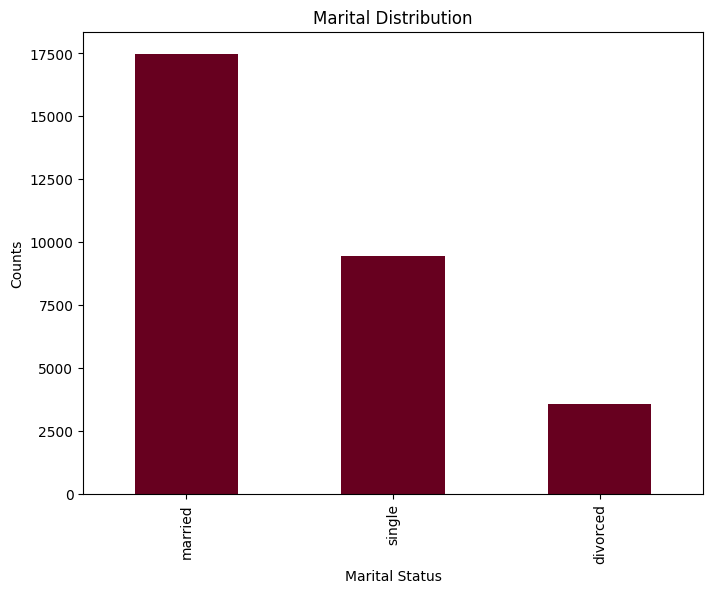

In [19]:
# Marital Distribution
df.marital.value_counts().plot(kind = 'bar', figsize = (8, 6), xlabel = 'Marital Status', ylabel = 'Counts', rot = 90, fontsize = 10, colormap = 'RdBu', title = 'Marital Distribution')
plt.show()


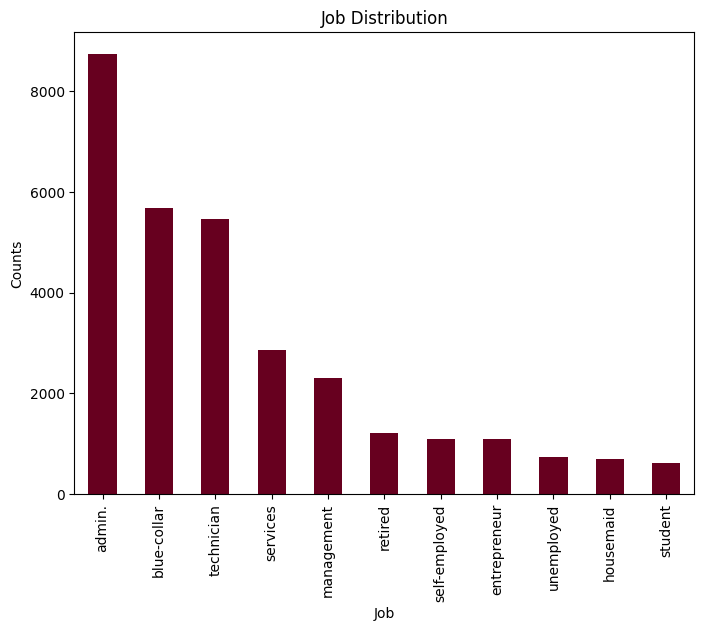

In [20]:
# Age Distribution
df.job.value_counts().plot(kind = 'bar', figsize = (8, 6), xlabel = 'Job', ylabel = 'Counts', rot = 90, fontsize = 10, colormap = 'RdBu', title = "Job Distribution")
plt.show()

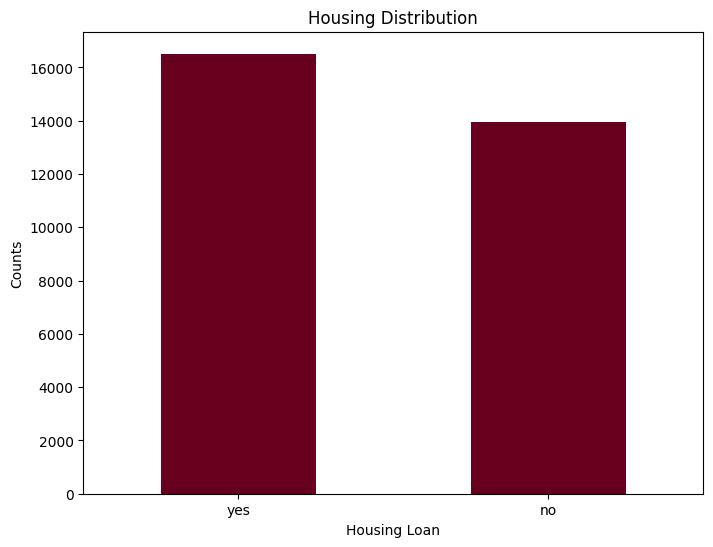

In [21]:
# Housing Distribution
df.housing.value_counts().plot(kind = 'bar', figsize = (8, 6), xlabel = 'Housing Loan', ylabel = 'Counts', rot = 0, fontsize = 10, colormap = 'RdBu', title = "Housing Distribution")
plt.show()

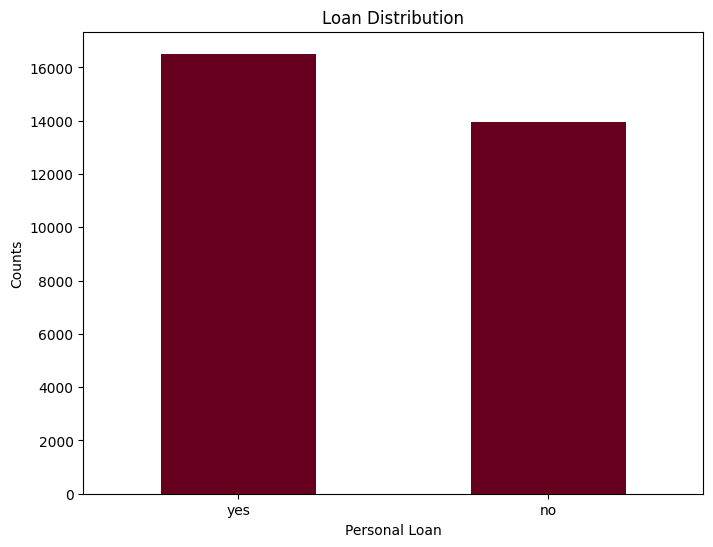

In [22]:
# Lone Distribution
df.lone.value_counts().plot(kind = 'bar', figsize = (8, 6), xlabel = 'Personal Loan', ylabel = 'Counts', rot = 0, fontsize = 10, colormap = 'RdBu', title = "Loan Distribution")
plt.show()

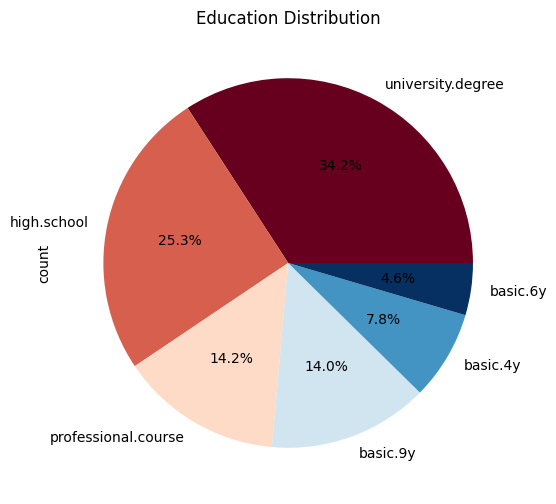

In [23]:
# Job Distribution
df.education.value_counts().nlargest(6).plot(kind = 'pie', figsize = (8, 6), autopct = '%1.1f%%', rot = 90, fontsize = 10, colormap = 'RdBu', title = "Education Distribution")
plt.show()

In order to be able to visualize the Age attribute we divide the values of the column into chunks (30-40, 41-50, 51-60, .....etc)

In [24]:
# Converting the values of age column into ranges to make the visualization of it simple            # 31 to 94
def create_range (row):
    if row <= 40 :
        return '30-40'
    elif 41 >= row < 51:
        return '41-50'
    elif 51 >= row < 60:
        return '51-60'
    elif 61 >= row < 70:
        return '61-70'
    elif 71 >= row < 80:
        return '71-80'
    elif 81 >= row < 90:
        return '81-90'
    elif 91 >= row < 100:
        return '91-100'
    else :
        return 'Above 100'
df.age = df.age.apply(create_range)    

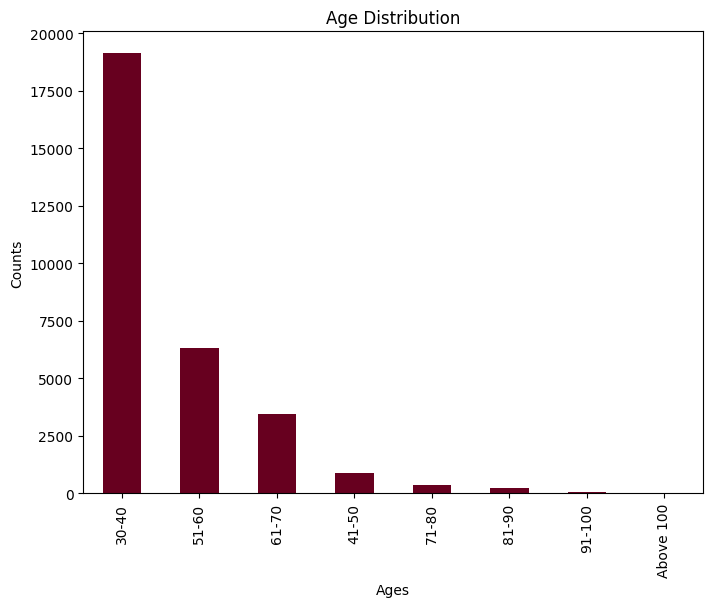

In [25]:
# Age Distribution
df.age.value_counts().plot(kind = 'bar', figsize = (8, 6), xlabel = 'Ages', ylabel = 'Counts', rot = 90, fontsize = 10, colormap = 'RdBu', title = "Age Distribution")
plt.show()


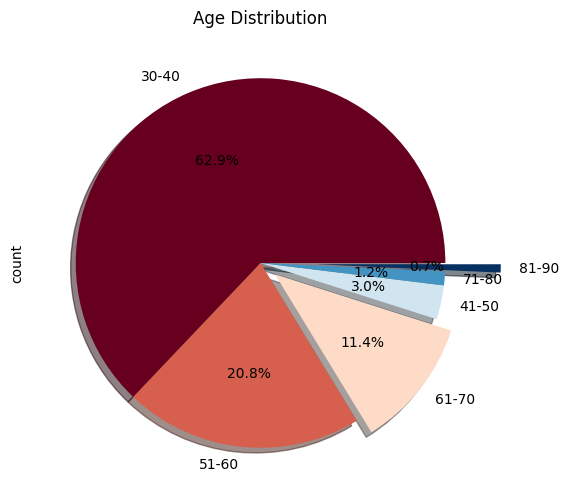

In [26]:
# Age Distribution
explode = [0, 0, 0.1, 0, 0, 0.3]
df.age.value_counts().nlargest(6).plot(kind = 'pie', figsize = (8, 6), autopct = '%1.1f%%', explode = explode, shadow= True, rot = 0, fontsize = 10, colormap = 'RdBu', title = "Age Distribution")
plt.show()

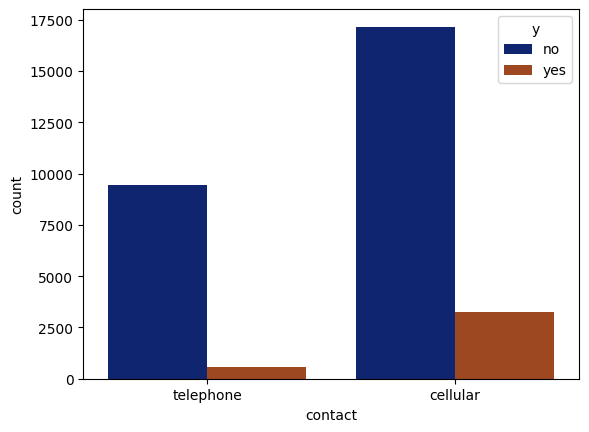

In [27]:
# Contact Distribution
sns.countplot(data = df, x = df.contact, hue = df.y, palette = 'dark', legend = 'auto')
plt.show()

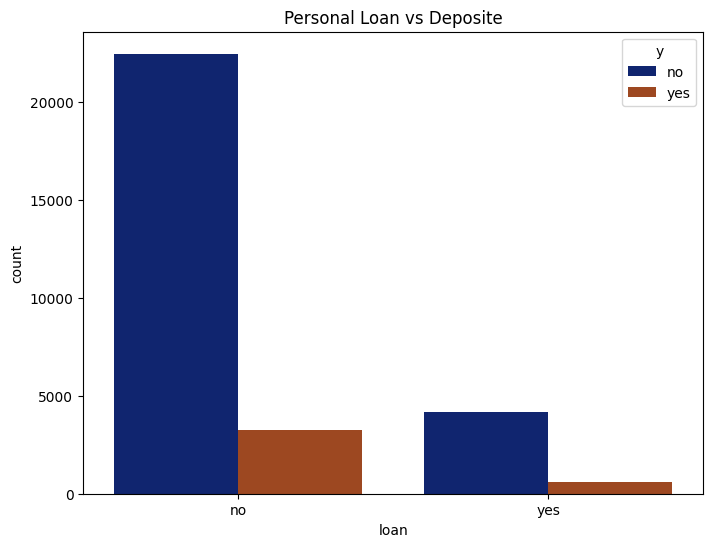

In [28]:
# Loan Distribution 
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = df.loan, hue = df.y, palette = 'dark')
plt.title("Personal Loan vs Deposite")
plt.show()

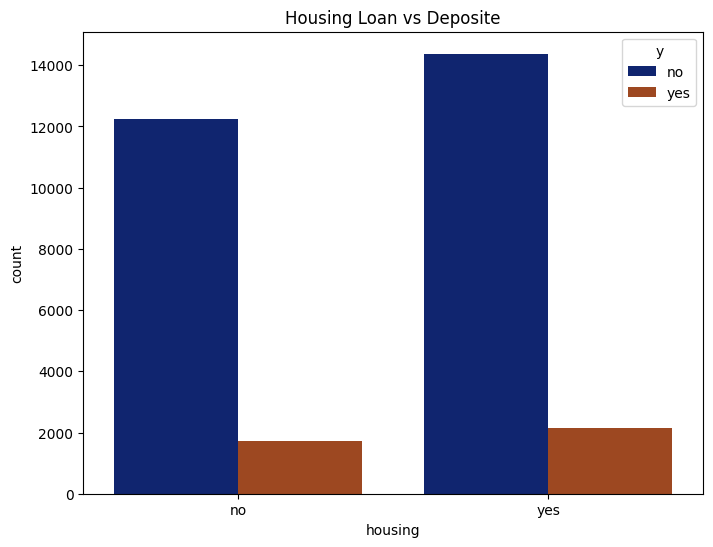

In [29]:
# Loan Distribution 
plt.figure(figsize=(8, 6))
sns.countplot(data = df, x = df.housing, hue = df.y, palette = 'dark')
plt.title("Housing Loan vs Deposite")
plt.show()

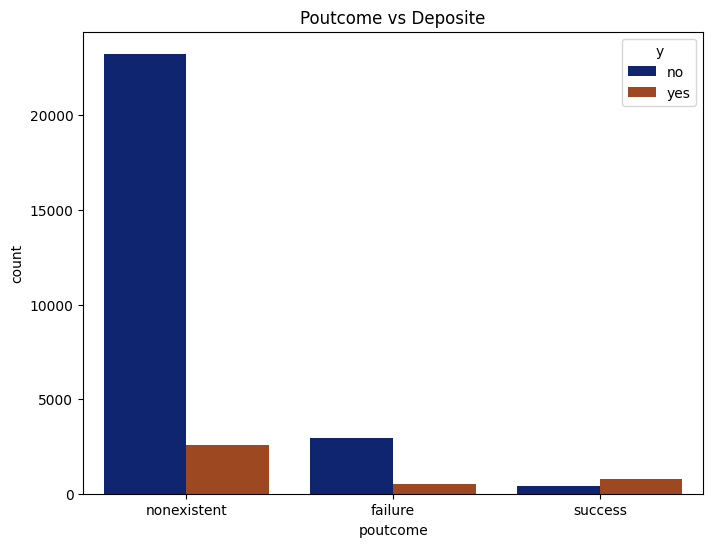

In [30]:
# Poutcome Distribution 
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = df.poutcome, palette = 'dark', hue = df.y)
plt.title("Poutcome vs Deposite")
plt.show()

Next, We try to catch any relationship between the social and economic context attributes.

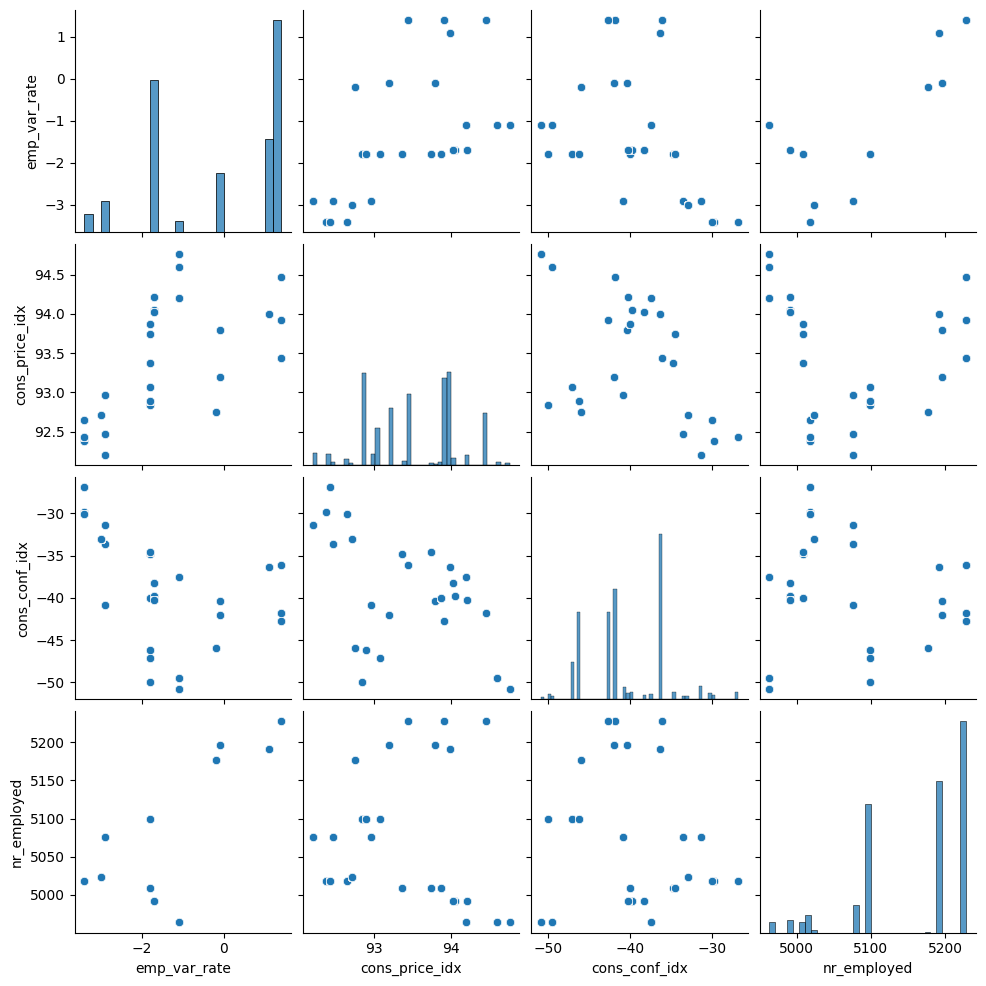

In [31]:
features = ['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'nr_employed']
sns.pairplot(df[features], palette = 'bright')
plt.show()

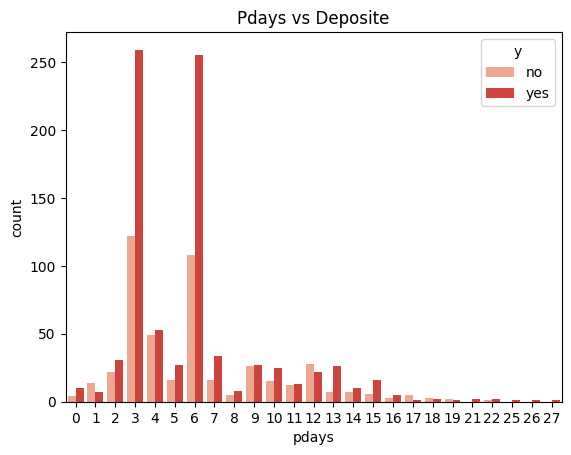

In [32]:
# Display a countplot which shows the y value for each num of days passed by after the client was last contacted
exclude_999 = df[df.pdays != 999]  # Excluding clients were not previously contacted
sns.countplot(x = exclude_999.pdays, hue = exclude_999.y, palette = 'Reds',)
plt.title('Pdays vs Deposite')
plt.show()


In order to be able to visualize the Duration attribute we divide the values of the column into chunks (0-60, 60-120, 120-180, .....etc)

In [33]:
# Duration Distribution
def change_values(row) :
    for i in range(0, 1441, 60):
        if i <= row < i + 60 :
            return f'{i}-{i+60}'
df.duration = df.duration.apply(change_values)

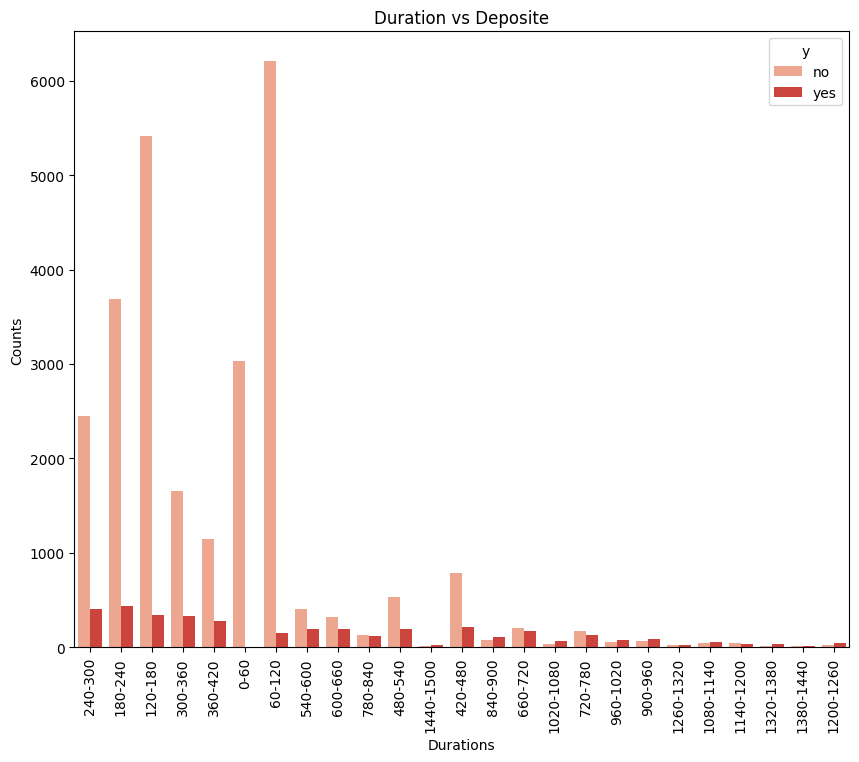

In [34]:
# Duration Distribution
plt.figure(figsize=(10, 8))
sns.countplot(x = df.duration, hue = df.y, palette = 'Reds')
plt.xticks(rotation=90)
plt.xlabel('Durations', fontsize = 10)
plt.ylabel('Counts', fontsize = 10)
plt.title('Duration vs Deposite')
plt.show()

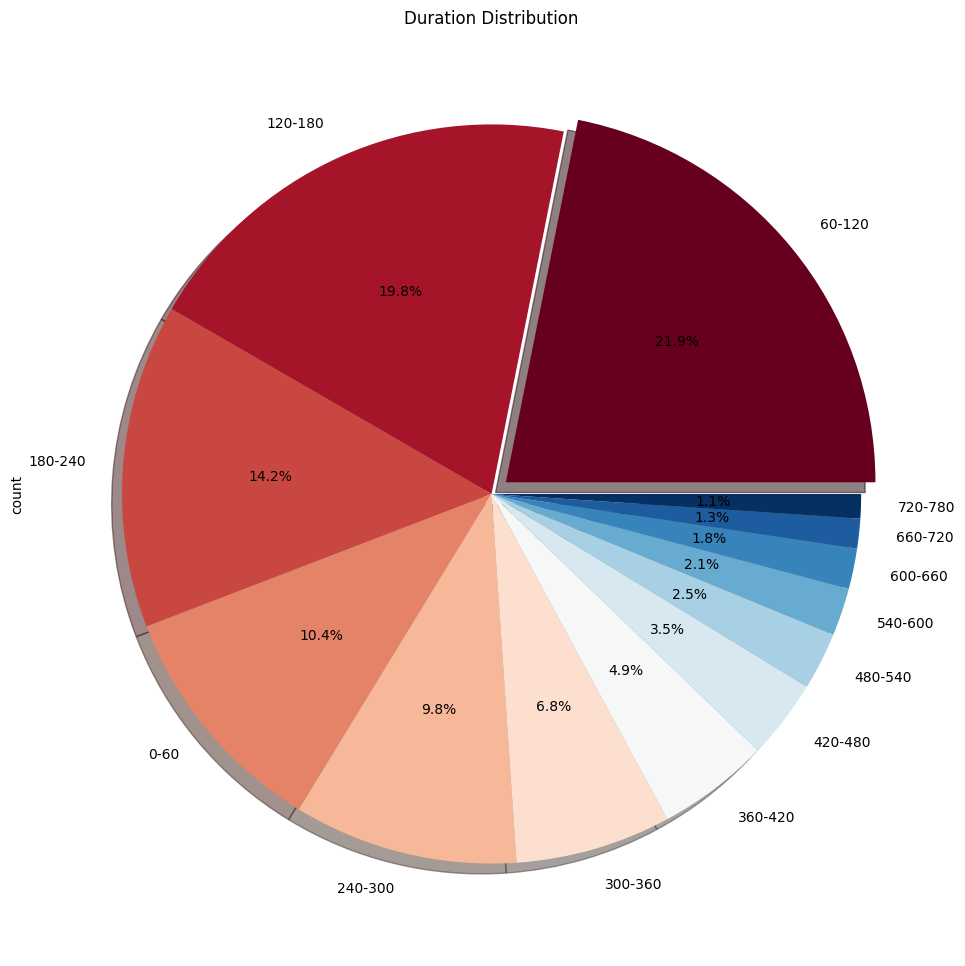

In [35]:
# Duration Distribution
explode = [0.05 if i == 0 else 0 for i in range (13) ]
df.duration.value_counts().nlargest(13).plot(kind = 'pie', figsize = (14, 12), autopct = '%1.1f%%', shadow= True, explode = explode, rot = 0, fontsize = 10, colormap = 'RdBu', title = "Duration Distribution")
plt.show()

In [36]:
# We want to retrieve the values of age attribute before making them as chunks.
data = pd.read_csv("bank-additional-full.csv")
# Get only the age attribute indcies of clean data.
age_index = df.age.index
df.age = data.age.loc[age_index]

In [37]:
# Get only the Duration attribute indcies of clean data.
duration_index = df.duration.index
df.duration = data.duration.loc[duration_index]

Next, We use the correlation heatmap in order to find the relationships between all the numerical attributes in the dataset, alse define the type of the realationship(linear or not linear), is it strong or weak?
    and ultimatly is it positive or negative?.

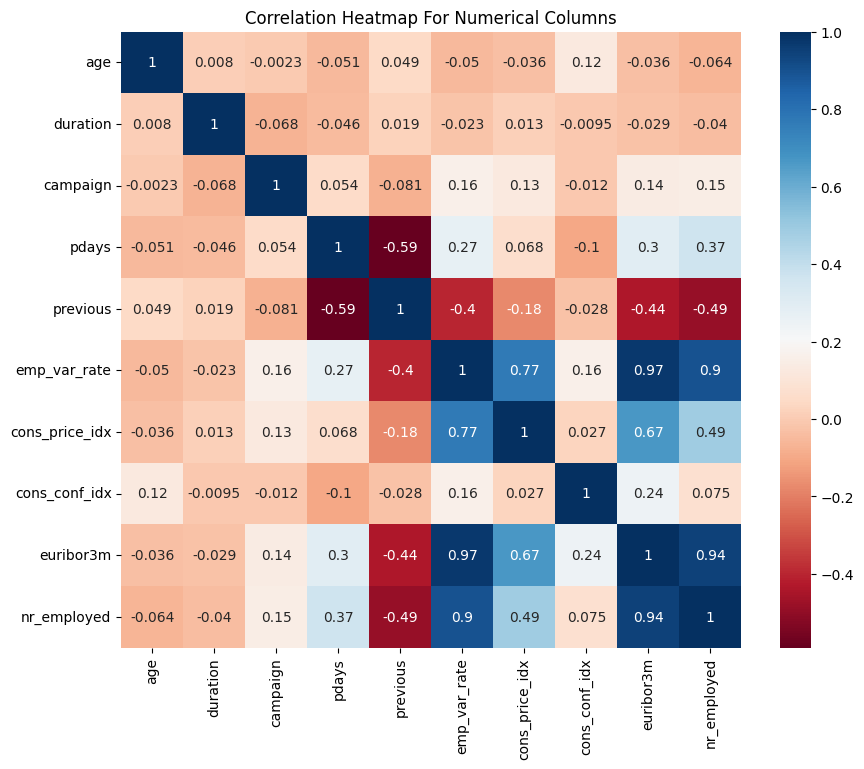

In [38]:
# Heatmap plot
plt.figure(figsize = (10, 8))
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns
sns.heatmap(df[numerical_cols].corr(), annot = True, cmap = 'RdBu')
plt.title('Correlation Heatmap For Numerical Columns')
plt.show()